<a href="https://colab.research.google.com/github/Elizabethpg22/Actividad_3_ValoresAtipicos/blob/main/Gastos_y_costos_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_2023 =pd.read_excel ('Gastos y costos 20-23.xlsx', sheet_name= '2023', skiprows= 3)
df_2023 = df_2023.drop(['Otros'], axis = 1)
df_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Fecha        397 non-null    datetime64[ns]
 1   Folio        384 non-null    object        
 2   UUID         397 non-null    object        
 3   RFC          397 non-null    object        
 4   Proveedor    397 non-null    object        
 5   TIPO GASTO   389 non-null    object        
 6   Descripción  397 non-null    object        
 7   MP           326 non-null    object        
 8   FP           326 non-null    float64       
 9   TC           397 non-null    float64       
 10  Importe      397 non-null    float64       
 11  IVA          397 non-null    float64       
 12  RET ISR      397 non-null    float64       
 13  RET IVA      397 non-null    float64       
 14  TOTAL MX     397 non-null    float64       
 15  TOTAL SAT    397 non-null    float64       
 16  Tipo    

In [2]:
#Remplazar valores nulos del dataframe con bfill
df_2023 = df_2023.fillna(method='bfill')
#Corroborar valores nulos
valores_nulos1 = df_2023.isnull().sum()
valores_nulos1

Fecha          0
Folio          0
UUID           0
RFC            0
Proveedor      0
TIPO GASTO     0
Descripción    0
MP             1
FP             1
TC             0
Importe        0
IVA            0
RET ISR        0
RET IVA        0
TOTAL MX       0
TOTAL SAT      0
Tipo           0
Status         0
Poliza         8
dtype: int64

In [5]:
#Remplazar los nulos con desconocido
df_2023[['Poliza','MP']]= df_2023[['Poliza','MP']].fillna("Desconocido")
df_2023['FP']= df_2023['FP'].fillna(1)

In [6]:
#Corroborar valores nulos
valores_nulos1 = df_2023.isnull().sum()
valores_nulos1

Fecha          0
Folio          0
UUID           0
RFC            0
Proveedor      0
TIPO GASTO     0
Descripción    0
MP             0
FP             0
TC             0
Importe        0
IVA            0
RET ISR        0
RET IVA        0
TOTAL MX       0
TOTAL SAT      0
Tipo           0
Status         0
Poliza         0
dtype: int64

In [7]:
ALFABETICAS = df_2023.iloc[: , [0,1,2,3,4,5,6,7,16,17,18]]
NUMERICAS  = df_2023.iloc[: ,[8,9,10,11,12,13,14,15]]

<Figure size 1500x500 with 0 Axes>

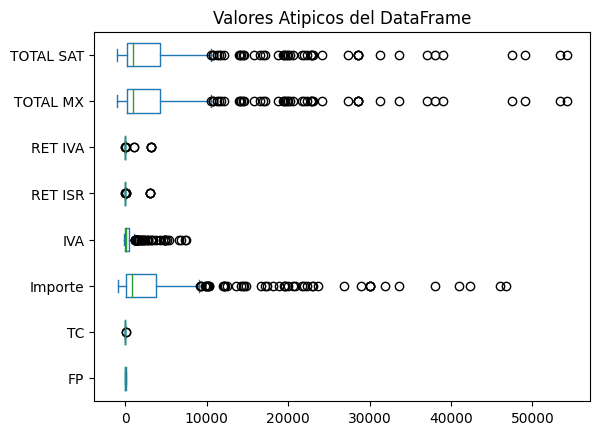

In [8]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig=plt.figure(figsize=(15,5))
NUMERICAS.plot(kind='box', vert=False)
plt.title('Valores Atipicos del DataFrame')
plt.show() #Dibujamos el diagrama

In [9]:
#Procedimiento de desviacion estandar para eliminar outliers en dataframe
y= NUMERICAS
Limite_superior =y.mean() + 3*y.std()
Limite_inferior =y.mean() - 3*y.std()

print('Limite superior permitido', Limite_superior)
print('Limite inferior permitido', Limite_inferior)

Limite superior permitido FP             186.748132
TC               4.957143
Importe      26557.244156
IVA           3761.774707
RET ISR        931.175004
RET IVA       1022.471745
TOTAL MX     29218.464899
TOTAL SAT    29218.464899
dtype: float64
Limite inferior permitido FP             -99.030247
TC              -2.774030
Importe     -18708.366775
IVA          -2766.954304
RET ISR       -869.142712
RET IVA       -947.124289
TOTAL MX    -20512.146863
TOTAL SAT   -20512.146863
dtype: float64


In [10]:
#Encontramos Outliers del DataFrame
outliers = NUMERICAS[(y>Limite_superior)|(y<Limite_inferior)]
#Obtenemos datos limpios del DataFrame
NUMERICAS_IQR = NUMERICAS[(y<=Limite_superior)&(y>=Limite_inferior)]
NUMERICAS_IQR

,FP,TC,Importe,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,99.0,1.0,0.00,0.00,0.0,0.0,0.00,0.00
1,99.0,1.0,0.00,0.00,0.0,0.0,0.00,0.00
2,99.0,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60
3,99.0,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30
4,99.0,1.0,8454.37,1352.70,0.0,0.0,9807.07,9807.07
...,...,...,...,...,...,...,...,...
392,3.0,1.0,0.00,0.00,0.0,0.0,0.00,0.00
393,1.0,1.0,220.00,0.00,0.0,0.0,220.00,220.00
394,3.0,1.0,18071.52,682.40,0.0,0.0,18753.92,18753.92
395,5.0,1.0,14472.32,0.00,0.0,0.0,14472.32,14472.32


In [11]:
##Remplazamos valores atipicos (nulos) del dataframe con "mean"
NUMERICOS_CLEAN = NUMERICAS_IQR.copy()
NUMERICOS_CLEAN  = NUMERICOS_CLEAN .fillna(round(NUMERICAS_IQR.mean(), 1))
NUMERICOS_CLEAN

,FP,TC,Importe,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,99.0,1.0,0.00,0.00,0.0,0.0,0.00,0.00
1,99.0,1.0,0.00,0.00,0.0,0.0,0.00,0.00
2,99.0,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60
3,99.0,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30
4,99.0,1.0,8454.37,1352.70,0.0,0.0,9807.07,9807.07
...,...,...,...,...,...,...,...,...
392,3.0,1.0,0.00,0.00,0.0,0.0,0.00,0.00
393,1.0,1.0,220.00,0.00,0.0,0.0,220.00,220.00
394,3.0,1.0,18071.52,682.40,0.0,0.0,18753.92,18753.92
395,5.0,1.0,14472.32,0.00,0.0,0.0,14472.32,14472.32


In [12]:
#Unimos la columna 'indice_tiempo on el dataframe
Datos_COMPLETOS = pd.concat([ALFABETICAS, NUMERICOS_CLEAN ], axis=1)
Datos_COMPLETOS

,Fecha,Folio,UUID,RFC,Proveedor,TIPO GASTO,Descripción,MP,Tipo,Status,Poliza,FP,TC,Importe,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,2023-01-01,31,49536321-60A4-523E-A32F-E8BDF5C2276E,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,PPD,P,Vigente,PE01-ENE23,99.0,1.0,0.00,0.00,0.0,0.0,0.00,0.00
1,2023-01-01,38,20FBB63B-D550-512F-9668-EEC6F983CEB7,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,PPD,P,Vigente,PE01-ENE23,99.0,1.0,0.00,0.00,0.0,0.0,0.00,0.00
2,2023-01-01,341932,DB8C4388-D4E0-4F0C-A09C-77C773257F44,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 30/36 de 03/12/...,PPD,I,Vigente,PE01-ENE23,99.0,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60
3,2023-01-01,341933,A81A63F5-D5EC-4601-803E-375AF9CC5021,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 30/36 de 03/12/...,PPD,I,Vigente,PE02-ENE23,99.0,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30
4,2023-01-01,342205,DCC10492-DE51-4C87-8430-5676FBF81931,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000009486 5/48 de 03/12/2...,PPD,I,Vigente,PE03-ENE23,99.0,1.0,8454.37,1352.70,0.0,0.0,9807.07,9807.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,2023-02-01,882974,3E97C399-6747-4BCA-8436-ED4B0933DF33,BIN940223KE0,"BANCO INVEX, S.A., INSTITUCION DE BANCA MULTIP...",COMISION BANCARIA,COMISIONES E INTERESES,PUE,I,Vigente,Desconocido,3.0,1.0,0.00,0.00,0.0,0.0,0.00,0.00
393,2023-02-01,053560,B7132758-F800-4797-B1D6-CC61AFFEE444,BPU7901018D4,BEBIDAS PURIFICADAS,ALIMENTOS,Epura 20 Lts Policarbonato,PUE,I,Vigente,Desconocido,1.0,1.0,220.00,0.00,0.0,0.0,220.00,220.00
394,2023-02-01,1092957089,D1E2DC1E-9FFB-46C6-82E4-B350B83CB6F7,BMN930209927,BANCO MERCANTIL DEL NORTE SA INSTITUCION DE BA...,COMISION BANCARIA,SERVICIOS BANCARIOS,PUE,I,Vigente,Desconocido,3.0,1.0,18071.52,682.40,0.0,0.0,18753.92,18753.92
395,2023-02-01,1453820,6249FE27-6FA6-4EFB-910E-3CD67A0E29A1,EFE8908015L3,EFECTIVALE S. de R.L. de C.V.,GASOLINA,CONSUMOS DE COMBUSTIBLE DE MONEDEROS ELECTRONICOS,PUE,I,Vigente,Desconocido,5.0,1.0,14472.32,0.00,0.0,0.0,14472.32,14472.32


In [13]:
#Corroborar valores nulos
valores_nulos = Datos_COMPLETOS.isnull().sum()
valores_nulos

Fecha          0
Folio          0
UUID           0
RFC            0
Proveedor      0
TIPO GASTO     0
Descripción    0
MP             0
Tipo           0
Status         0
Poliza         0
FP             0
TC             0
Importe        0
IVA            0
RET ISR        0
RET IVA        0
TOTAL MX       0
TOTAL SAT      0
dtype: int64

In [14]:
Datos_COMPLETOS.to_csv("2023_clean.csv")
from google.colab import files
files.download("2023_clean.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>